In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
# from unidecode import unidecode # For replacing non-english characters
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import re
from collections import Counter

In [2]:
pd.set_option('display.max_rows', None)

# Step 1: Read and display the script and character data. For now, we will just merge the columns  into one dataframe

In [3]:
harry_potter1_df = pd.read_csv('../Data/harry_potter/Harry Potter 1.csv')
harry_potter2_df = pd.read_csv('../Data/harry_potter/Harry Potter 2.csv')
harry_potter3_df = pd.read_csv('../Data/harry_potter/Harry Potter 3.csv')
                            

In [4]:
harry_potter1_df['Movie'] = 'HARRY POTTER 1'
harry_potter2_df['Movie'] = 'HARRY POTTER 2'
harry_potter3_df['Movie'] = 'HARRY POTTER 3'

In [5]:
print(harry_potter1_df.columns)
print("*******************************")
print(harry_potter2_df.columns)
print("*******************************")
print(harry_potter3_df.columns)

Index(['Character', 'Sentence', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Movie'],
      dtype='object')
*******************************
Index(['Character', 'Sentence', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Movie'],
      dtype='object')
*******************************
Index(['CHARACTER', 'SENTENCE', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Movie'],
      dtype='object')


In [6]:
harry_potter3_df = harry_potter3_df.rename(columns={'CHARACTER':'Character', 'SENTENCE':'Sentence'})

In [7]:
harry_potter3_df.Movie.value_counts()

HARRY POTTER 3    1639
Name: Movie, dtype: int64

In [8]:
# Get rid of garbage columns
cols_to_keep = ['Character', 'Sentence', 'Movie']
harry_potter1_df = harry_potter1_df[cols_to_keep]
harry_potter2_df = harry_potter2_df[cols_to_keep]
harry_potter3_df = harry_potter3_df[cols_to_keep]

In [9]:
print(harry_potter1_df.columns)
print("*******************************")
print(harry_potter2_df.columns)
print("*******************************")
print(harry_potter3_df.columns)

Index(['Character', 'Sentence', 'Movie'], dtype='object')
*******************************
Index(['Character', 'Sentence', 'Movie'], dtype='object')
*******************************
Index(['Character', 'Sentence', 'Movie'], dtype='object')


In [10]:
harry_potter_df = pd.concat([harry_potter1_df, harry_potter2_df, harry_potter3_df])

In [11]:
harry_potter_df.shape

(4417, 3)

In [12]:
harry_potter_df.describe()

,Character,Sentence,Movie
count,4412,4406,4417
unique,186,3684,3
top,HARRY,Oh,HARRY POTTER 3
freq,547,59,1639


# Step 2: Look at distinct values of character column for each movie

In [13]:
harry_potter_df = harry_potter_df.astype(str)

In [14]:
def get_char_stats(df):
    print(f"We have {len(df.Character.unique())} characters as follows for Harry Potter:\n {df.Character.unique()}")
        

In [15]:
get_char_stats(harry_potter_df)

We have 187 characters as follows for Harry Potter:
 ['Dumbledore' 'McGonagall' 'Hagrid' 'Petunia' 'Dudley' 'Vernon' 'Harry'
 'Snake' 'Someone' ' either an owl' 'Barkeep\xa0Tom' 'Man' 'Witch'
 'Quirrell' 'Boy' 'Goblin' 'Griphook' 'Ollivander' 'Trainmaster'
 'Mrs. Weasley' 'George' 'Fred' 'Ginny' 'Ron' 'Woman' 'Hermione' 'Neville'
 'Malfoy' 'Whispers' 'Sorting Hat' 'Seamus' 'Percy' 'Sir Nicholas' 'Girl'
 'Man in paint' 'Fat Lady' 'Snape' 'Dean' 'nan' 'Madam Hooch' 'Class'
 'Harry ' 'Fred  ' 'Ron  ' 'George  ' 'Harry  ' 'Hermione  ' 'Ron '
 'Hermione ' 'Filch' 'All  ' 'Oliver ' 'Oliver  ' 'Flitwick' 'Draco  '
 'Flitwick  ' 'Seamus  ' 'Girl  ' 'Boy  ' 'Percy  ' 'McGonagall '
 'Ron and Harry' 'McGonagall  ' 'Quirrell  ' 'Snape  ' 'OIiver  '
 'Lee Jordan' 'Hagrid ' 'Gryffindors  ' 'Flint  ' 'Crowd  ' 'Flint'
 'Hagrid  ' 'Man  ' 'Lee  Jordan' 'Madam Hooch ' 'Quirrell ' 'Filch  '
 'Dumbledore  ' 'Hermoine' 'Ron and Harry  ' 'Filch ' 'Firenze  '
 'Firenze ' 'Snape ' 'Neville  ' 'Ron   ' 'Volde

*We notice that cleaning up the values will greatly lower the number of characters

In [16]:
def clean_df(df):
    df.Character = df.Character.str.strip()
    df.Character = df.Character.str.upper()
    return df

In [17]:
harry_potter_df = clean_df(harry_potter_df)

In [18]:
get_char_stats(harry_potter_df)

We have 109 characters as follows for Harry Potter:
 ['DUMBLEDORE' 'MCGONAGALL' 'HAGRID' 'PETUNIA' 'DUDLEY' 'VERNON' 'HARRY'
 'SNAKE' 'SOMEONE' 'EITHER AN OWL' 'BARKEEP\xa0TOM' 'MAN' 'WITCH'
 'QUIRRELL' 'BOY' 'GOBLIN' 'GRIPHOOK' 'OLLIVANDER' 'TRAINMASTER'
 'MRS. WEASLEY' 'GEORGE' 'FRED' 'GINNY' 'RON' 'WOMAN' 'HERMIONE' 'NEVILLE'
 'MALFOY' 'WHISPERS' 'SORTING HAT' 'SEAMUS' 'PERCY' 'SIR NICHOLAS' 'GIRL'
 'MAN IN PAINT' 'FAT LADY' 'SNAPE' 'DEAN' 'NAN' 'MADAM HOOCH' 'CLASS'
 'FILCH' 'ALL' 'OLIVER' 'FLITWICK' 'DRACO' 'RON AND HARRY' 'OIIVER'
 'LEE JORDAN' 'GRYFFINDORS' 'FLINT' 'CROWD' 'LEE  JORDAN' 'HERMOINE'
 'FIRENZE' 'VOLDEMORT' 'STUDENTS' 'UNCLE VERNON' 'AUNT PETUNIA' 'DOBBY'
 'AUNT\xa0PETUNIA\xa0& DUDLEY' 'MR. WEASLEY' 'MR. BORGIN' 'LUCIUS MALFOY'
 'PHOTOGRAPHER' 'LOCKHART' 'HARRY AND RON' 'PROFESSOR SPROUT'
 'PENELOPE CLEARWATER' 'COLIN' 'GILDEROY LOCKHART' 'CORNISH PIXIES' 'WOOD'
 'VOICE' 'ENEMIES OF THE HEIR' 'PICTURE' 'SLYTHERINS' 'MADAM POMFREY'
 'MOANING MYRTLE' 'JUSTIN FINCH-FLE

In [19]:
def fix_spelling(char):
    if char == 'OIIVER':
        char = 'OLIVER'
    if 'BARKEEP' in char:
        char = 'BARKEEP'
    return char 

In [20]:
harry_potter_df.Character = harry_potter_df.Character.apply(fix_spelling)

In [21]:
get_char_stats(harry_potter_df)

We have 108 characters as follows for Harry Potter:
 ['DUMBLEDORE' 'MCGONAGALL' 'HAGRID' 'PETUNIA' 'DUDLEY' 'VERNON' 'HARRY'
 'SNAKE' 'SOMEONE' 'EITHER AN OWL' 'BARKEEP' 'MAN' 'WITCH' 'QUIRRELL'
 'BOY' 'GOBLIN' 'GRIPHOOK' 'OLLIVANDER' 'TRAINMASTER' 'MRS. WEASLEY'
 'GEORGE' 'FRED' 'GINNY' 'RON' 'WOMAN' 'HERMIONE' 'NEVILLE' 'MALFOY'
 'WHISPERS' 'SORTING HAT' 'SEAMUS' 'PERCY' 'SIR NICHOLAS' 'GIRL'
 'MAN IN PAINT' 'FAT LADY' 'SNAPE' 'DEAN' 'NAN' 'MADAM HOOCH' 'CLASS'
 'FILCH' 'ALL' 'OLIVER' 'FLITWICK' 'DRACO' 'RON AND HARRY' 'LEE JORDAN'
 'GRYFFINDORS' 'FLINT' 'CROWD' 'LEE  JORDAN' 'HERMOINE' 'FIRENZE'
 'VOLDEMORT' 'STUDENTS' 'UNCLE VERNON' 'AUNT PETUNIA' 'DOBBY'
 'AUNT\xa0PETUNIA\xa0& DUDLEY' 'MR. WEASLEY' 'MR. BORGIN' 'LUCIUS MALFOY'
 'PHOTOGRAPHER' 'LOCKHART' 'HARRY AND RON' 'PROFESSOR SPROUT'
 'PENELOPE CLEARWATER' 'COLIN' 'GILDEROY LOCKHART' 'CORNISH PIXIES' 'WOOD'
 'VOICE' 'ENEMIES OF THE HEIR' 'PICTURE' 'SLYTHERINS' 'MADAM POMFREY'
 'MOANING MYRTLE' 'JUSTIN FINCH-FLETCHLEY' 'CRABBE'

In [22]:
harry_potter_df.Character.value_counts()

HARRY                       883
RON                         485
HERMIONE                    469
HAGRID                      337
LUPIN                       207
DUMBLEDORE                  196
MCGONAGALL                  132
SNAPE                       118
DRACO                        95
MRS. WEASLEY                 75
SIRIUS                       70
GILDEROY LOCKHART            69
DOBBY                        62
FUDGE                        55
UNCLE VERNON                 51
FILCH                        50
PETUNIA                      46
PERCY                        44
FRED                         41
TRELAWNEY                    39
MR. WEASLEY                  39
VERNON                       39
AUNT MARGE                   37
QUIRRELL                     36
LUCIUS MALFOY                36
NEVILLE                      35
MALFOY                       33
GEORGE                       32
SEAMUS                       31
STAN SHUNPIKE                27
VOLDEMORT                    26
MADAM HO

In [23]:
top10_chars_harry_potter = harry_potter_df.Character.value_counts().index.tolist()[:10]

In [24]:
top10_chars_harry_potter

['HARRY',
 'RON',
 'HERMIONE',
 'HAGRID',
 'LUPIN',
 'DUMBLEDORE',
 'MCGONAGALL',
 'SNAPE',
 'DRACO',
 'MRS. WEASLEY']

In [25]:
harry_potter_df.Movie.value_counts()

HARRY POTTER 3    1639
HARRY POTTER 1    1519
HARRY POTTER 2    1259
Name: Movie, dtype: int64

*Based on the value counts, we see that Harry Potter 3 has the most speaking lines, with Harry Potter 1 having the least. Now let's take a look at the dialog*

In [26]:
def clean_sentence(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))

    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text



In [27]:
harry_potter_df.columns

Index(['Character', 'Sentence', 'Movie'], dtype='object')

In [28]:
harry_potter_df.Sentence = harry_potter_df.Sentence.apply(clean_sentence)

In [29]:
harry_potter_df.Sentence

0                                    shouldve known would
1                                            good evening
2                                             rumors true
3                                               im afraid
4                                                good bad
5                                                     boy
6                                         hagrid bringing
7             think wise trust hagrid something important
8                                                      ah
9                                    professor dumbledore
10                                   professor mcgonagall
11                                               problems
12                                                       
13                 little tyke fell asleep flying bristol
14                                               try wake
15                                                     go
16                                                  albus
17            

In [30]:
len(harry_potter_df.Sentence.unique())

3052

# Step 3: We will look at the vocabulary of each character overall¶

In [31]:
harry_potter_df['corpus_sentence'] = harry_potter_df.Sentence.apply(lambda x: Counter(x.split()))

In [32]:
def consolidate_char_vocab(df, character):
    char_vocabularies = df[df.Character == character].corpus_sentence
    list_of_dicts = char_vocabularies.tolist()
    master_dict = list_of_dicts[0]
    for dictionary in list_of_dicts[1:]:
        master_dict = master_dict + dictionary
    return master_dict

In [33]:
top10_chars_harry_potter

['HARRY',
 'RON',
 'HERMIONE',
 'HAGRID',
 'LUPIN',
 'DUMBLEDORE',
 'MCGONAGALL',
 'SNAPE',
 'DRACO',
 'MRS. WEASLEY']

In [34]:
dict_of_char_vocabs = {}
for char in top10_chars_harry_potter:
    dict_of_char_vocabs[char] = consolidate_char_vocab(harry_potter_df, char)
    

In [35]:
dict_of_char_vocabs

{'HARRY': Counter({'yes': 10,
          'hes': 12,
          'asleep': 2,
          'sorry': 9,
          'doesnt': 5,
          'understand': 4,
          'like': 15,
          'watching': 1,
          'people': 3,
          'press': 1,
          'ugly': 1,
          'faces': 2,
          'hear': 4,
          'mean': 12,
          'youre': 10,
          'burma': 1,
          'nice': 1,
          'miss': 1,
          'family': 2,
          'see': 18,
          'thats': 16,
          'well': 10,
          'never': 8,
          'knew': 5,
          'parents': 7,
          'either': 2,
          'mummy': 1,
          'anytime': 1,
          'swear': 3,
          'one': 16,
          'minute': 5,
          'glass': 2,
          'gone': 5,
          'wear': 2,
          'dudleys': 1,
          'old': 2,
          'uniform': 1,
          'itll': 5,
          'fit': 1,
          'bits': 1,
          'elephant': 1,
          'skin': 1,
          'hey': 6,
          'theres': 5,
          'post

In [36]:
dict_of_char_vocabs.keys()

dict_keys(['HARRY', 'RON', 'HERMIONE', 'HAGRID', 'LUPIN', 'DUMBLEDORE', 'MCGONAGALL', 'SNAPE', 'DRACO', 'MRS. WEASLEY'])

In [37]:
dict_of_char_vocabs['SNAPE']

Counter({'foolish': 1,
         'wandwaving': 1,
         'silly': 1,
         'incantations': 1,
         'class': 1,
         'however': 2,
         'tell': 2,
         'bottle': 1,
         'fame': 1,
         'brew': 1,
         'glory': 1,
         'even': 1,
         'put': 2,
         'stopper': 1,
         'death': 1,
         'mr': 1,
         'potter': 5,
         'new': 1,
         'celebrity': 1,
         'dont': 3,
         'know': 2,
         'well': 6,
         'difference': 1,
         'monkshood': 2,
         'wolfsbane': 2,
         'pity': 1,
         'clearly': 2,
         'silence': 2,
         'hand': 1,
         'information': 1,
         'asphodel': 1,
         'wormwood': 1,
         'make': 1,
         'sleeping': 1,
         'potion': 1,
         'powerful': 1,
         'known': 1,
         'draught': 1,
         'living': 1,
         'dead': 1,
         'bezoar': 1,
         'stone': 1,
         'taken': 2,
         'stomach': 1,
         'goat': 1,
        

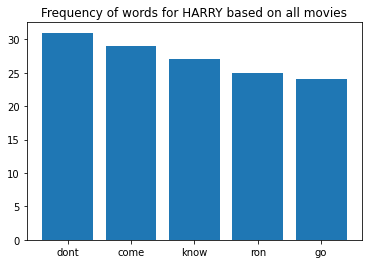

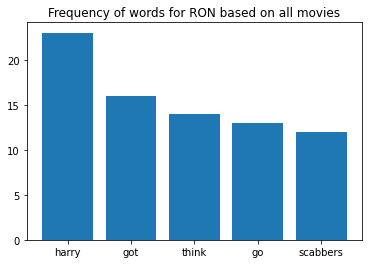

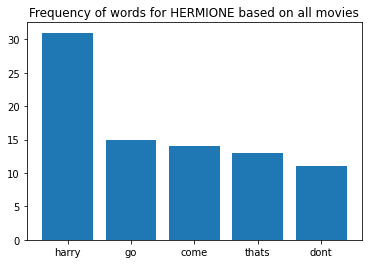

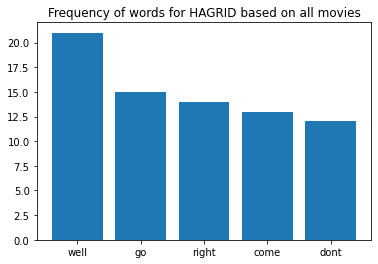

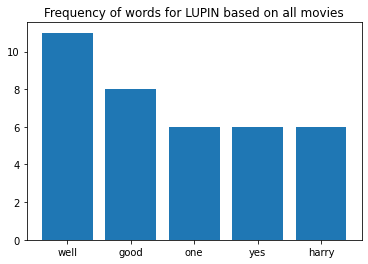

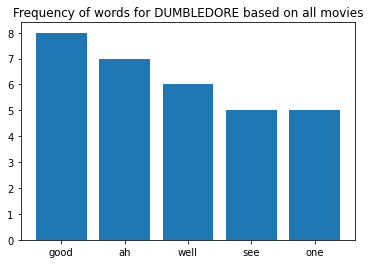

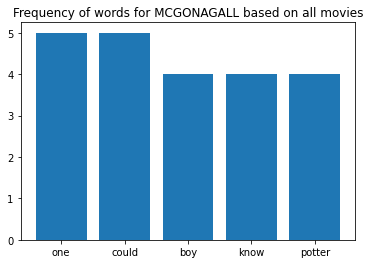

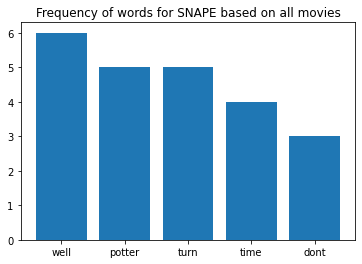

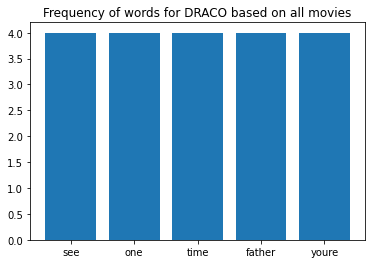

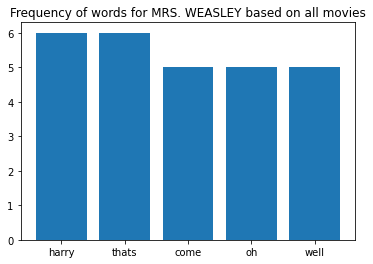

In [38]:
for char in dict_of_char_vocabs:
    data = dict_of_char_vocabs[char]
    top5_words = sorted(data, key=data.get, reverse=True)[:5]



    subset = {key: data[key] for key in top5_words}
    names = list(subset.keys())
    values = list(subset.values())
    plt.title('Frequency of words for ' + char + ' based on all movies')
    plt.bar(range(len(subset)), values, tick_label=names)
    plt.show()

